# Deep Learning Use for Identifying Invasive Breast Cancer

Invasive ductal carcinoma (IDC) is the most common type of breast cancer. About 80% of all breast cancers are invasive ductal carcinomas. According to the American Cancer Society, about 1 out of 8 women (about 13%) will develop invasive breast cancer over the course of her lifetime and more than 180,000 women in the United States find out they have invasive breast cancer each year. Death rates have been steady in women under 50 since 2007 but have continued to drop in women over 50. The overall death rate from breast cancer decreased by 1% per year from 2013 to 2018. These decreases are thought to be the result of treatment advances and earlier detection through screening. These statistics are frightening and heighten the need to rapidly diagnose and cure invasive ductal carcinoma in women, who are the most disproportionally affected. 

Analysis of digital tissue regions in whole slide images (WSI) of breast cancer (BCa) for precise delineation of IDC in WSI is crucial to the subsequent estimation of tumor grading (i.e disease aggressiveness) and predicting patient outcome. However, such analysis for BCa detection is a time consuming and challenging task primarily because it involves a pathologist scanning large swathes of benign regions to ultimately identify the areas of malignancy. Moreover, there are additional challenges such as issues with slide preparation, variations in staining and scanning across sites, and vendor platforms, as well as biological variance, such as the presentation of many grades of diseases ([Cruz-Roa et al., 2014](https://engineering.case.edu/centers/ccipd/sites/ccipd.case.edu/files/Automatic_detection_of_invasive_ductal_carcinoma_in_whole.pdf)). Traditional approaches using handcrafted image features (color, texture and edges, nuclear textural and architecture) have been shown to underperform in delineating the regions containing invasive cancer. They might require several algorithmic iterations and substantial effort to capture the diversity of image patterns embedded within large datasets and are therefore not implicitly poised to efficiently manipulate large datasets into classifiers. Deep learning approaches on the other hand are similar to how human brain works using different interpretation levels or layers of most representative and useful features in the data resulting into a hierarchical learned representation. These methods have shown to outpace traditional approaches (that include handcrafted features for data representation and machine learning methods for learning task) of common challenging problems in several areas such as computer vision and pattern recognition tasks. This is due to the wide availability of big data and powerful computational resources. They can iteratively improve upon learned representations of the underlying data with the goal of attaining the best classification in the data. 

In this study, I will use [data](https://academictorrents.com/details/e40bd59ab08861329ce3c418be191651f35e2ffa) from digitized histopathology slides from 162 women diagnosed with IDC at the Hospital of the University of Pennsylvania and the Cancer Institute of New Jersey ([Cruz-Roa et al., 2014](https://engineering.case.edu/centers/ccipd/sites/ccipd.case.edu/files/Automatic_detection_of_invasive_ductal_carcinoma_in_whole.pdf), [Janowczyk and Madabhushi, 2016](https://www.jpathinformatics.org/article.asp?issn=2153-3539;year=2016;volume=7;issue=1;spage=29;epage=29;aulast=Janowczyk)). All slides were digitized via a whole-slide scanner at 40x magnification. From the whole slide images (WSI), 277,524 images patches (tissue regions) of size 50*50 were extracted (198,738 IDC negative and 78,786 IDC positive). The goal of this study is to use deep learning models such as convolutional neural networks (CNN) to identify patches which are IDC positive. This study will help address the challenges of consuming time and manual handcrafting of image features faced by pathologists when trying to delineate areas of invasive breast cancer. This will be extremely useful to quickly assess disease aggressiveness (i.e tumor grading) and predicting patient outcome in a shorter time, thus providing quick diagnosis to women and have them start treatment as soon as possible. Such study can potentially benefit hospitals, clinics, mobile teams such as Doctors Without Borders.

There are several deep learning architectures, but the most commonly used that performs the best for image classification are convolutional neural networks (CNN). I will use 3 pre-trained CNN models such as VGG-19, Resnet50 and InceptionV3 with TensorFlow to predict IDC regions in my full training (training + validation) set and evaluate the models on the test set. Those are models pre-trained on a large dataset. Such a network would have already learned features that are useful for most computer vision problems, and leveraging such features could allow to reach a better accuracy than any method that would only rely on the available data.

Because of the limited availability of CPU and GPU for this study, I will only use a subset of my large dataset.  


## **1 - Importing the data**

For this analysis, I loaded the data which consisted of 16105 image patches mostly of size 50*50 with invasive ductal carcinoma (IDC) positive and negative. This represents about 6% of the entire dataset that I could use due to limited GPU availability. The data images had 3 color channels, with values in the range [0, 255]. To be able to reproduce my results, I had to initialize a random see generator for the Python environment, numpy and tensorflow, as suggested by these posts on [MachineLearningMastery](https://machinelearningmastery.com/reproducible-results-neural-networks-keras/) and [StackOverflow](https://stackoverflow.com/questions/48631576/reproducible-results-using-keras-with-tensorflow-backend). This was done at the beginning of my import section. However, the results could not be easily reproducible each time when running on a GPU, which is what I did for the sake of computational power.



In [ ]:
# To get reproducible results for CPU run. This may NOT work for GPU run.
# Seed value 
seed_value= 792

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value) # tensorflow 2.x
# tf.set_random_seed(seed_value) # tensorflow 1.x

# 5. Configure a new global `tensorflow` session
import keras
from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,accuracy_score, f1_score, roc_curve, roc_curve,roc_auc_score, confusion_matrix, classification_report
from sys import getsizeof
import cv2
from natsort import natsorted
import zipfile


In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input, decode_predictions, VGG19
# from keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.models import Model, Sequential
from keras.optimizers import RMSprop, Adam, SGD
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Thinkful_Training/Python_For_Data_Scientists/Data_Images/

!ls -l 

/content/gdrive/My Drive/Thinkful_Training/Python_For_Data_Scientists/Data_Images
total 474
-rw------- 1 root root 472613 Apr 19 14:55 model.png
drwx------ 2 root root   4096 Apr 24 05:01 Test_Images
drwx------ 2 root root   4096 Apr 24 05:00 Training_Images
drwx------ 2 root root   4096 Apr 18 05:32 Validation_Images


## **2 - Data Exploration**

There are 16105 images data, with most of them of shape (50, 50, 3), where size (50, 50) represent the height and width, and 3 represents the 3 input channels RGB for the color mode, with values between [0, 255]. 

Even though the default size for each of the 3 pre-trained CNN models are different, I resized all the images to the same pixel size (112, 112), which was very useful to cut down on computational runtime without compromising too much on the performance of the models.

Because I am having images which are either IDC negative (0) or IDC positive (1), I have a binary classification problem. And I mostly interested in identifying IDC positive images, which would imply presence of cancer.

In [ ]:
# Directory for image data
train_dir = '/content/gdrive/My Drive/Thinkful_Training/Python_For_Data_Scientists/Data_Images/Training_Images'
validation_dir = '/content/gdrive/My Drive/Thinkful_Training/Python_For_Data_Scientists/Data_Images/Validation_Images'
test_dir = '/content/gdrive/My Drive/Thinkful_Training/Python_For_Data_Scientists/Data_Images/Test_Images'


I loaded the data using the Keras preprocessing function image_dataset_from_directory(), which allowed me to have data for each class and for each of my 3 datasets: training set (9010 total samples), validation set (2426 total samples) and test set (4669 total samples). 

In [ ]:
imagesize = (112, 112) # This is the pixel size for my data, for faster runs. 
batchsize = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Training_Images",
    labels="inferred",
    label_mode="int",
    validation_split=0.82,
    subset="training",
    seed=4937,
    image_size=imagesize,
    batch_size=batchsize,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Validation_Images",
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    seed=4937,
    image_size=imagesize,
    batch_size=batchsize,
)


Found 50052 files belonging to 2 classes.
Using 9010 files for training.
Found 24264 files belonging to 2 classes.
Using 2426 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Test_Images",
    labels="inferred",
    label_mode="binary",
    seed=4937,
    image_size=imagesize,
    batch_size=batchsize,
)

Found 4669 files belonging to 2 classes.


In [ ]:
# Number of samples per data set. 
nb_train_samples = 9010
nb_validation_samples = 2426
nb_test_samples = 4669

### **2.1 - Labels and Image Data**
There are 9010 total idc negative and positive samples for the training set, with 5960 idc negative and 3050 idc positive. There is a class imbalance with the majority class (idc negative (0) class) being ~2 times larger than the minority class (idc positive (1) class). This is not as close to the 2.5 ratio of the original very large dataset (227k+). My goal for the next steps of this project is to be able to select larger data and respect that ratio when loading the data. 

Let's have a look at a couple of image data, which are now of shape (112, 112, 3).

In [ ]:
image_list = []
label_list = []
for images, labels in train_ds.take(1):
  image_list.append(images)
  label_list.append(labels)

image_list = np.array(image_list)
label_list = np.array(label_list)

label_list

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
      dtype=int32)

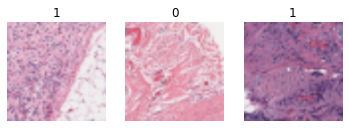

In [ ]:
# Original images
for i in range(14,17): 
  ax = plt.subplot(1,3,i-13)
  plt.imshow(image_list[0][i].astype("uint8"))
  plt.title(int(label_list[0][i]))
  plt.axis('off')


### **2.3 - Data Augmentation**

In order to make the most of our few training examples, I will "augment" them via a number of random transformations, so that my model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better. I will do this via the keras.preprocessing.image.ImageDataGenerator class. The class allows to:
- Configure random transformations and normalization operations to be done on your image data during training. In my case I did rotation and horizontal flip.
- Instantiate generators of augmented image batches (and their labels) via the method .flow(data, labels) or .flow_from_directory(directory) (which I used). These generators can then be used with the Keras model methods that accept data generators as inputs such as .fit(), .evaluate(), .predict().

** Note that the validation data and the test test should not be augmented.

** The rescaling and other normalization operations could be done inside the ImageDataGenerator class, but I prefer to apply such steps through the preprocessing_function within the model building block.

Let's have a look at the augmented data images of the original images plotted earlier. 

In [ ]:
train_datagen = ImageDataGenerator(validation_split = 0.82,
                                   rotation_range = 40,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(validation_split = 0.1)

In [ ]:

# Flow training images in batches of 100 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 100, class_mode = 'binary', subset="training", target_size = (112, 112))

# Flow validation images in batches of 40 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size = 40, class_mode = 'binary', subset="validation", target_size = (112, 112))


Found 9010 images belonging to 2 classes.
Found 2426 images belonging to 2 classes.


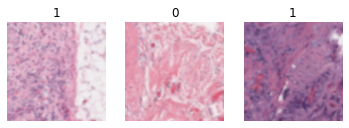

In [ ]:
# Augmented data of the original images above. The function below performs the same operations as the ones from the ImageDataGenerator.
# It was just easier to use it to ensure that I was plotting the same exact original images augmented.
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation((-0.2, 0.2))
    ]
) 


augm_images = data_augmentation(image_list[0])
for i in range(14,17): 
  ax = plt.subplot(1,3,i-13)
  plt.imshow(augm_images[i].numpy().astype("uint8"))
  plt.title(int(label_list[0][i]))
  plt.axis('off')


I use the prefetch() tensorflow transformation for my dataset input pipelines. This allows later elements to be prepared (input pipeline is reading the data for step s+1) while the current element is being processed (the model is executing training step s). This often improves latency and throughput, at the cost of using additional memory to store prefetched elements. Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data. 

I will set the number of elements to prefetch to tf.data.AUTOTUNE, which will prompt the tf.data runtime to tune the value dynamically at runtime.

I will use training and validation data from the ImageDataGenerator above, and will use the test set from below.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)



In [ ]:
def get_model_metrics(model, test_dataset, verbose = True):
    score = model.evaluate(test_dataset, verbose=0) 
    print(model.metrics_names, '\n', score)
    print()

    if verbose:
        print('Accuracy Score: {}'.format(score[5]))
        print('Precision Score: {}'.format(score[6]))
        print('Recall: {}'.format(score[7]))
        print('AUC: {}'.format(score[8]))

        f1score = 2 * (score[6] * score[7]) / (score[6] + score[7])
        print('F1-score: {}'.format(f1score))
        print('Confusion matrix: \n{}'.format(np.array([[int(score[3]), int(score[2])], [int(score[4]), int(score[1])]])))
    
    return score[5], score[6], score[7], f1score, score[8]

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


## **3 - VGG19 model**
VGG19 model architecture was pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like jackfruit and syringe. This pre-trained model will already have learned features that are relevant to such image classification problem. This base of knowledge could help classify positive and negative idc from my specific dataset.

The pixels need to be prepared in the same way as the ImageNet training data was prepared, i.e (224, 224, 3). Specifically, from the paper on very deep CNN for large-scale image recognition (https://arxiv.org/abs/1409.1556). For the sake of available computational power, I used image pixels of shape (112, 112, 3) and ran some tests which showed that using such image size does not have too much impact on the model's performance.



### **3.1 - Baseline model**
I start by running a baseline model of the VGG19() architecture on my breast cancer dataset. This is to have an idea of how VGG19 performs and have some baseline metrics before trying to improve it.

Most diagrams of machine learning models go from bottom to top. VGG19 model has 19 layers where the bottom 16 are a combination of convolutional and maxpool (reduce the size of feature maps by using operations such as average or maximum value, ...) layers and the top 3 are dense fully connected layers that include the classification/output layer. For the baseline model, it is common practice to  use the very last layer before the flatten (maxpool) operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.


- First, I instantiate a VGG19 model pre-loaded with weights trained on ImageNet. By specifying the include_top=False argument, I load a network that doesn't include the classification layers at the top, which is ideal for feature extraction. This feature extractor converts each 112x112x3 image into a 3x3x512 block of features.

- I will then freeze the convolutional base (bottom 16 layers) created from the previous step and use it as a feature extractor. It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training.

- Input data need some preprocessing (rescaling, normalization, ...) before being fed to the VGG19 model. That is handled by the tf.keras.applications.vgg19.preprocess_input function. 

- To generate predictions from the block of features, flatten over the spatial 3x3 locations, using a tf.keras.layers.Flatten layer to convert the features to a single 4608-vector per image.

- I apply a tf.keras.layers.Dense layer to add 3 fully connected dense layers from which the first two are of size 1024 and the 3rd one (the final top layer) is the output classifier layer with 1 output, given that I have a binary classification problem. The first two dense layers use 'ReLu' activation function to introduce nonlinearity, which makes the model classify better and improves computational time. Both of them are each followed by a dropout layer which helps prevent overfitting. The final output layer uses a sigmoid function as activation function, which is appropriate for binary classification problems.

I then compile the model using a binary_crossentropy loss function and the SGD optimizer with a learning rate of 1e-6. A low learning rate is to make sure that the magnitude of the updates stays very small, so as not to wreck the previously learned features. Finally I trained my model on the training set for 20 epochs with a batch size of 100 and 40 for the training and validation sets respectively.

In [ ]:
# Drop the 3 fully connected layers of the loaded ResNet50 model by using include_top=False.
base_model_vgg19_shape = VGG19(include_top=False, weights='imagenet', input_shape=(112, 112, 3)) 

base_model_vgg19_shape.summary()


80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 112, 112, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 112, 112, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 112, 112, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 56, 56, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 56, 56, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 56, 56, 128)       147584    
______________________________________________________________

In [ ]:
# Drop the 3 fully connected layers of the loaded VGG19 model by using include_top=False.
base_model_vgg19 = VGG19(include_top=False, weights='imagenet') 

# Freeze the base_model
base_model_vgg19.trainable = False

# Create new model on top
inputs = keras.Input(shape=(112, 112, 3))

# Format for data which includes rescaling and/or other normalization operations.
x = tf.keras.applications.vgg19.preprocess_input(inputs) 

# The base model contains batchnorm layers. We want to keep them in inference mode when we unfreeze the base model for fine-tuning, 
# so we make sure that the base_model is running in inference mode here.
x = base_model_vgg19(x, training=False)

# Generate predictions from the block of features, flatten over the spatial locations and output an 4608-vector.
x = tf.keras.layers.Flatten()(x)

# Add 2 fully connected layers each followed by dropout. Regularizing with a dropout layer could help with overfitting.
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)  
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)

# 3rd fully connected dense layres which is the final/classifier layer.
outputs = keras.layers.Dense(1, activation=('sigmoid'))(x) 

model_vgg19 = keras.Model(inputs, outputs)


my_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5),
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]


initial_epochs = 20
learn_rate=1e-6 
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False) 


model_vgg19.compile(
    loss='binary_crossentropy',
    optimizer=sgd,
    metrics=METRICS)

model_vgg19.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 112, 112, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem_1 ( (None, 112, 112, 3)       0         
_________________________________________________________________
tf.nn.bias_add_1 (TFOpLambda (None, 112, 112, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, None, None, 512)   20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              4719616   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0   

In [ ]:
train_batch_size = 100 
validation_batch_size = 40 
vgg_model_history_base = model_vgg19.fit(train_generator,
                                         steps_per_epoch=nb_train_samples // train_batch_size,
                                         epochs=initial_epochs,
                                         validation_data=validation_generator,
                                         validation_steps=nb_validation_samples // validation_batch_size)


Epoch 1/20
90/90 [==============================] - 41s 437ms/step - loss: 3.3288 - tp: 1493.9560 - fp: 1976.3516 - tn: 4283.7363 - fn: 1459.4615 - accuracy: 0.6374 - precision: 0.4441 - recall: 0.5089 - auc: 0.6137 - prc: 0.3975 - val_loss: 1.0403 - val_tp: 334.0000 - val_fp: 476.0000 - val_tn: 1178.0000 - val_fn: 412.0000 - val_accuracy: 0.6300 - val_precision: 0.4123 - val_recall: 0.4477 - val_auc: 0.6270 - val_prc: 0.3934
Epoch 2/20
90/90 [==============================] - 38s 423ms/step - loss: 3.0044 - tp: 622.1209 - fp: 1145.8022 - tn: 1861.3626 - fn: 962.6923 - accuracy: 0.5387 - precision: 0.3538 - recall: 0.3933 - auc: 0.5056 - prc: 0.3563 - val_loss: 1.0233 - val_tp: 281.0000 - val_fp: 370.0000 - val_tn: 1279.0000 - val_fn: 470.0000 - val_accuracy: 0.6500 - val_precision: 0.4316 - val_recall: 0.3742 - val_auc: 0.6346 - val_prc: 0.4042
Epoch 3/20
90/90 [==============================] - 38s 425ms/step - loss: 2.7757 - tp: 627.4176 - fp: 1048.4286 - tn: 1936.8681 - fn: 921.901

I plotted the training and validation accuracy and loss below. The validation accuracy is above the training one, which is a sign that the model might not be overfitting the data and might generalize well. 

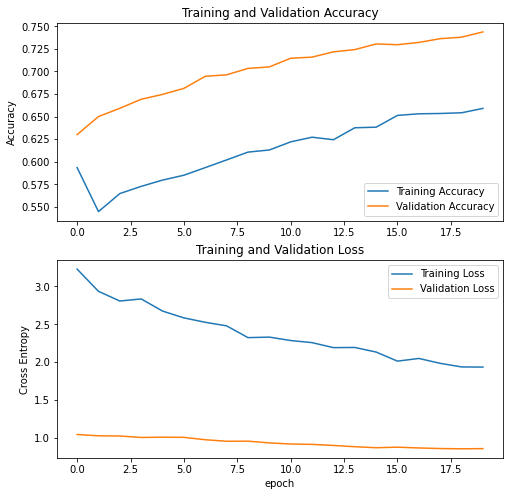

In [ ]:
acc_value = vgg_model_history_base.history['accuracy']
val_acc_value = vgg_model_history_base.history['val_accuracy']

loss_value = vgg_model_history_base.history['loss']
val_loss_value = vgg_model_history_base.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_value, label='Training Accuracy')
plt.plot(val_acc_value, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_value, label='Training Loss')
plt.plot(val_loss_value, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Accuracy, precision, recall, and f1 scores are important metrics. For medical dataset, it is important to reduce false negatives as they can cost lives (predicting to not have breast cancer when we actually have cancer can cost women's lives). On the other hand, false positives will alarm women and maybe expose them to treatment they didn't need, but will not cost lives. Because of that, I am mostly interested in recall and f1-score, though I need also to make sure there is good trade-off between precision and recall. There are cases where the model can predict all 0 or all 1, which would skew the precision and recall. As such, it is important to look at f1-score as well.

Looking at the metrics below, I have average values for recall and f1-score. This could be due to the fact that I am having an imbalance dataset, about twice as much negatives compared to positives. 


In [ ]:
acc, prec, recall, f1, auc = get_model_metrics(model_vgg19, test_ds, verbose = True) 


['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc'] 
 [0.7148589491844177, 613.0, 386.0, 2892.0, 778.0, 0.750696063041687, 0.6136136054992676, 0.44069015979766846, 0.7604526281356812, 0.5723351836204529]

Accuracy Score: 0.750696063041687
Precision Score: 0.6136136054992676
Recall: 0.44069015979766846
AUC: 0.7604526281356812
F1-score: 0.5129707144417454
Confusion matrix: 
[[2892  386]
 [ 778  613]]


- The low metrics above could be due to the fact that I have imbalance data. To deal with it, I initialized the initial bias by substracting 1.0 to the natural logarithm of the ratio of positives to negatives in the training set for a value of -1.67, this to help with the initial convergence of the baseline model. I then re-trained the model with the same parameters as above.

In [ ]:
# This function gives a starting point for guessing the value of the initial bias.
def initial_bias_loss(pos, neg):
  po_var = pos / (pos + neg) 

  initial_bias = np.log([pos/neg])
  initial_loss = -po_var * np.log(po_var) - (1 - po_var) * np.log(1 - po_var)

  return initial_bias, initial_loss

# Training set pos and neg 
pos = 3050
neg = 5960
init_bias, init_loss = initial_bias_loss(pos, neg)

print(init_bias, init_loss)

[-0.66992889] 0.6400440706647097


In [ ]:
# Drop the 3 fully connected layers of the loaded VGG19 model by using include_top=False.
base_model_vgg19 = VGG19(include_top=False, weights='imagenet') 

# Freeze the base_model
base_model_vgg19.trainable = False

# Create new model on top
inputs = keras.Input(shape=(112, 112, 3))

# Initialize bias
output_bias = tf.keras.initializers.Constant(init_bias - 1.0)

# Format for data which includes rescaling and/or other normalization operations.
x = tf.keras.applications.vgg19.preprocess_input(inputs) 

# The base model contains batchnorm layers. We want to keep them in inference mode when we unfreeze the base model for fine-tuning, 
# so we make sure that the base_model is running in inference mode here.
x = base_model_vgg19(x, training=False)

# Generate predictions from the block of features, flatten over the spatial spatial locations.
x = tf.keras.layers.Flatten()(x)

# Add 2 fully connected layers each followed by dropout. Regularize with dropout could help with overfitting.
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)  
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)

# 3rd fully connected dense layres which is the final/classifier layer.
outputs = keras.layers.Dense(1, activation=('sigmoid'), bias_initializer=output_bias)(x) 

model_vgg19 = keras.Model(inputs, outputs)


my_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5),
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]


initial_epochs = 20 
learn_rate=1e-6 
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False) 


model_vgg19.compile(
    loss='binary_crossentropy',
    optimizer=sgd,
    metrics=METRICS)

model_vgg19.summary()



Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 112, 112, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem_4 ( (None, 112, 112, 3)       0         
_________________________________________________________________
tf.nn.bias_add_4 (TFOpLambda (None, 112, 112, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, None, None, 512)   20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              4719616   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0   

In [ ]:
train_batch_size = 100
validation_batch_size = 40 

vgg_model_history_base = model_vgg19.fit(train_generator,
                                         steps_per_epoch=nb_train_samples // train_batch_size,
                                         epochs=initial_epochs,
                                         validation_data=validation_generator,
                                         validation_steps=nb_validation_samples // validation_batch_size,
                                         verbose=0
                                         )                                    


The validation accuracy is above the training one and validation loss below training one, suggesting possibly no overfitting. The metrics are slightly better now, but still average values recall and f1-score, with an almost equal amount of false negatives and false positives (643 vs 539).

I am going to fine-tune the model in order to see if that can help improve the model performance.

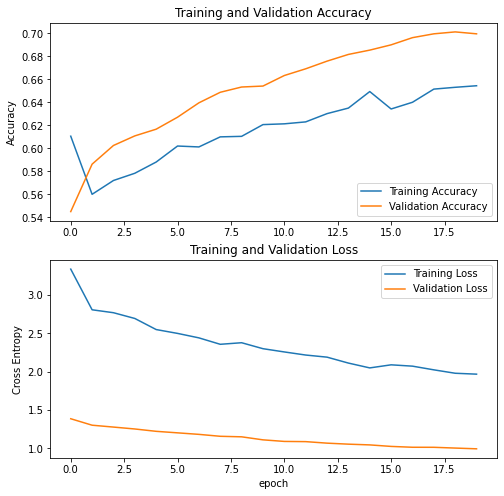

In [ ]:
acc_value = vgg_model_history_base.history['accuracy']
val_acc_value = vgg_model_history_base.history['val_accuracy']

loss_value = vgg_model_history_base.history['loss']
val_loss_value = vgg_model_history_base.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_value, label='Training Accuracy')
plt.plot(val_acc_value, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_value, label='Training Loss')
plt.plot(val_loss_value, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc, prec, recall, f1, auc = get_model_metrics(model_vgg19, test_ds, verbose = True) 


['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc'] 
 [0.6856971383094788, 748.0, 539.0, 2739.0, 643.0, 0.7468408942222595, 0.5811966061592102, 0.5377426147460938, 0.7660720348358154, 0.5778146386146545]

Accuracy Score: 0.7468408942222595
Precision Score: 0.5811966061592102
Recall: 0.5377426147460938
AUC: 0.7660720348358154
F1-score: 0.5586258428312956
Confusion matrix: 
[[2739  539]
 [ 643  748]]


### **3.2 - Fine-tuned model**
Now that I've trained the top-level classifier and that the model has learnt from the new data with acceptable performance metrics, I can fine-tune the model by fine-tuning convolutional weights alongside it. This training process will force the weights to be tuned from generic feature maps to features associated specifically with my dataset and could help improve the metrics by a few percentage. It could also potentially lead to quick overfitting -- keep that in mind.

In my case, I decided to unfreeze the top 5 layers of the convolutional base, then compiled and trained the model for an additional 15 epochs. This slightly improved the recall and f1-score.

This cause some increase in performance, with a 77% accuracy, 58% recall and 60% f1-score.


In [ ]:
# Unfreeze the base_model. 
base_model_vgg19.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_vgg19.layers))

# Fine-tune from this layer onwards, so freeze the layers above fine_tune_vgg19_at
fine_tune_vgg19_at = len(base_model_vgg19.layers[:-5]) 

for layer in base_model_vgg19.layers[:fine_tune_vgg19_at]:
  layer.trainable = False


model_vgg19.compile(
    loss='binary_crossentropy',
    optimizer=sgd,
    metrics=METRICS)

model_vgg19.summary()


Number of layers in the base model:  22
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 112, 112, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem_4 ( (None, 112, 112, 3)       0         
_________________________________________________________________
tf.nn.bias_add_4 (TFOpLambda (None, 112, 112, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, None, None, 512)   20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              4719616   
_________________________________________________________________
dropout_8 (Dropout)

In [ ]:
len(model_vgg19.trainable_variables)

14

In [ ]:
fine_tune_epochs = 15
total_epochs =  initial_epochs + fine_tune_epochs

vgg_model_history_fine = model_vgg19.fit(train_generator,
                                         steps_per_epoch=nb_train_samples // train_batch_size,
                                         epochs=total_epochs,
                                         validation_data=validation_generator,
                                         validation_steps=nb_validation_samples // validation_batch_size, 
                                         initial_epoch=vgg_model_history_base.epoch[-1],
                                         verbose=0
                                         )



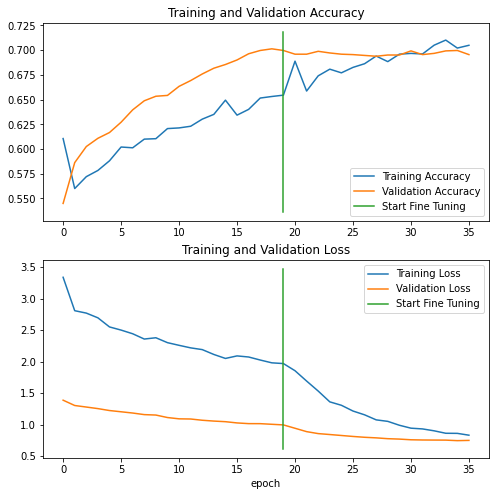

In [ ]:
acc_value += vgg_model_history_fine.history['accuracy']
val_acc_value += vgg_model_history_fine.history['val_accuracy']

loss_value += vgg_model_history_fine.history['loss']
val_loss_value += vgg_model_history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_value, label='Training Accuracy')
plt.plot(val_acc_value, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_value, label='Training Loss')
plt.plot(val_loss_value, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc, prec, recall, f1, auc = get_model_metrics(model_vgg19, test_ds, verbose = True) 


['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc'] 
 [0.5143750309944153, 812.0, 486.0, 2792.0, 579.0, 0.7718997597694397, 0.6255778074264526, 0.5837526917457581, 0.8032405376434326, 0.6282196640968323]

Accuracy Score: 0.7718997597694397
Precision Score: 0.6255778074264526
Recall: 0.5837526917457581
AUC: 0.8032405376434326
F1-score: 0.6039419815039305
Confusion matrix: 
[[2792  486]
 [ 579  812]]


### **3.3 - Summary for VGG19 training**

After training my baseline model, taking into account an updated initial bias, and then fine-tuning, the performance metrics of the VGG19 on my dataset is pretty acceptable as seen in the table below, as well as for the recall and f1-score my main metrics of interest.

| Model | Accuracy   | Precision   | Recall   | F1-score   |
|------|------|------|------|------|
|   VGG19 baseline   | 0.75 |  0.61  | 0.44 |  0.51  |
|   VGG19 baseline (with initial bias) | 0.75 |  0.58  | 0.54 |  0.56  |
|  VGG19 fine-tuned | 0.77 |   0.63  | 0.58 |  0.60  |

## **4 - ResNet50 model**
ResNet50 is another pre-trained model that I will use. The base process is the same except that this model has more layers and fewer parameters compared to VGG19. ResNet50 is 50 layers deep and was also pre-trained on the same ImageNet database as VGG19.

### **4.1 - Baseline model**

The main steps to build the baseline model are the same as with VGG19. The convolutional base was frozen and I trained the model on the last 3 dense fully connected layers. The input data are images of pixels (112, 112, 3).

I compiled the model using a binary_crossentropy loss function and the SGD optimizer with a learning rate of 1e-6. Finally I trained my model on the training set for 20 epochs with a batch size of 100 and 40 for the training and validation sets respectively.

In [ ]:
# Drop the 3 fully connected layers of the loaded ResNet50 model by using include_top=False.
base_model_resnet50 = ResNet50(include_top=False, weights='imagenet') 

# Freeze the base_model
base_model_resnet50.trainable = False

# Create new model on top
inputs = keras.Input(shape=(112, 112, 3))

# Format for data which includes rescaling and/or other normalization operations.
x = tf.keras.applications.resnet.preprocess_input(inputs) 

# The base model contains batchnorm layers. We want to keep them in inference mode when we unfreeze the base model for fine-tuning, 
# so we make sure that the base_model is running in inference mode here.
x = base_model_resnet50(x, training=False)

# Generate predictions from the block of features, by applying average pooling over the spatial dimensions and output an 2048-vector.
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add 2 fully connected layers each folowed by dropout. Regularize with dropout could help with overfitting.
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)  
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)

# 3rd fully connected dense layers which is the final/classifier layer.
outputs = keras.layers.Dense(1, activation=('sigmoid'))(x) 

model_resnet50 = keras.Model(inputs, outputs)


my_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5),
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]


94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
initial_epochs = 20
learn_rate=1e-6
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False) 


model_resnet50.compile(
    loss='binary_crossentropy',
    optimizer=sgd,
    metrics=METRICS)

model_resnet50.summary()


Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 112, 112, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem_5 ( (None, 112, 112, 3)       0         
_________________________________________________________________
tf.nn.bias_add_5 (TFOpLambda (None, 112, 112, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_20 (Dropout)         (None, 1024)              0  

In [ ]:
len(model_resnet50.trainable_variables)

6

In [ ]:
train_batch_size = 100 
validation_batch_size = 40 

resnet_model_history_base = model_resnet50.fit(train_generator,
                                               steps_per_epoch=nb_train_samples // train_batch_size,
                                               epochs = initial_epochs,
                                               validation_data=validation_generator,
                                               validation_steps=nb_validation_samples // validation_batch_size
                                               )                    

Epoch 1/20
90/90 [==============================] - 45s 458ms/step - loss: 0.8026 - tp: 1008.5385 - fp: 1689.5055 - tn: 4594.4725 - fn: 1949.6703 - accuracy: 0.6126 - precision: 0.3799 - recall: 0.3362 - auc: 0.5651 - prc: 0.3671 - val_loss: 0.6893 - val_tp: 83.0000 - val_fp: 372.0000 - val_tn: 1277.0000 - val_fn: 668.0000 - val_accuracy: 0.5667 - val_precision: 0.1824 - val_recall: 0.1105 - val_auc: 0.4414 - val_prc: 0.2646
Epoch 2/20
90/90 [==============================] - 39s 430ms/step - loss: 0.7924 - tp: 582.7582 - fp: 1089.4945 - tn: 1929.0220 - fn: 967.9560 - accuracy: 0.5511 - precision: 0.3466 - recall: 0.3820 - auc: 0.5068 - prc: 0.3526 - val_loss: 0.6844 - val_tp: 69.0000 - val_fp: 346.0000 - val_tn: 1304.0000 - val_fn: 681.0000 - val_accuracy: 0.5721 - val_precision: 0.1663 - val_recall: 0.0920 - val_auc: 0.4476 - val_prc: 0.2667
Epoch 3/20
90/90 [==============================] - 39s 436ms/step - loss: 0.7975 - tp: 572.1209 - fp: 1074.5055 - tn: 1923.8681 - fn: 977.9670 

The validation accuracy is above the training one, which is a sign that the model may not be overfitting the data and may generalize well. However, looking at the performance metrics, they are very low and there are too many false negatives (1352) and the recall and f1-score are very low.

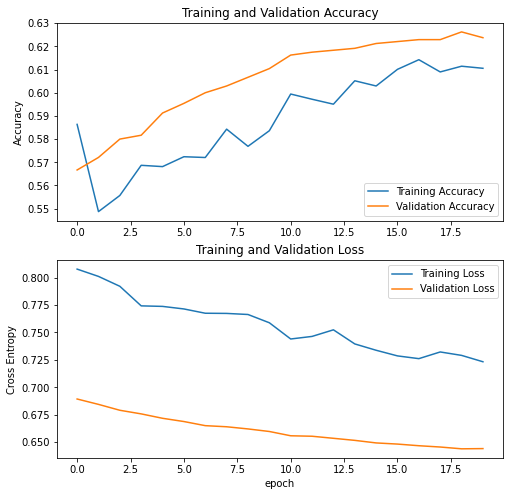

In [ ]:
acc_value = resnet_model_history_base.history['accuracy']
val_acc_value = resnet_model_history_base.history['val_accuracy']

loss_value = resnet_model_history_base.history['loss']
val_loss_value = resnet_model_history_base.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_value, label='Training Accuracy')
plt.plot(val_acc_value, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_value, label='Training Loss')
plt.plot(val_loss_value, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc, prec, recall, f1, auc = get_model_metrics(model_resnet50, test_ds, verbose = True) 


['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc'] 
 [0.6207037568092346, 39.0, 141.0, 3137.0, 1352.0, 0.6802313327789307, 0.21666666865348816, 0.028037382289767265, 0.5267629623413086, 0.2987755835056305]

Accuracy Score: 0.6802313327789307
Precision Score: 0.21666666865348816
Recall: 0.028037382289767265
AUC: 0.5267629623413086
F1-score: 0.049649903179550245
Confusion matrix: 
[[3137  141]
 [1352   39]]


- The non-convergence above could be due to the fact that I have imbalance data. To deal with it, I initialized the initial bias to the natural logarithm of the ratio of positives to negatives in the training set for a value of -0.67, this to help with the initial convergence of the baseline model. I then re-trained the model with the same parameters as above.

In [ ]:
# Drop the 3 fully connected layers of the loaded ResNet50 model by using include_top=False.
base_model_resnet50 = ResNet50(include_top=False, weights='imagenet') 

# Freeze the base_model
base_model_resnet50.trainable = False

# Create new model on top
inputs = keras.Input(shape=(112, 112, 3))

# Initialize bias
output_bias = tf.keras.initializers.Constant(init_bias)

# Format for data which includes rescaling and/or other normalization operations.
x = tf.keras.applications.resnet.preprocess_input(inputs) 

# The base model contains batchnorm layers. We want to keep them in inference mode when we unfreeze the base model for fine-tuning, 
# so we make sure that the base_model is running in inference mode here.
x = base_model_resnet50(x, training=False)

# Generate predictions from the block of features, by applying average pooling over the spatial dimensions and output an 2048-vector.
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add 2 fully connected layers each folowed by dropout. Regularize with dropout could help with overfitting.
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)  
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)

# 3rd fully connected dense layers which is the final/classifier layer.
outputs = keras.layers.Dense(1, activation=('sigmoid'), bias_initializer=output_bias)(x) 

model_resnet50 = keras.Model(inputs, outputs)


my_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5),
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]


In [ ]:
initial_epochs = 20 
learn_rate=1e-6
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False) 


model_resnet50.compile(
    loss='binary_crossentropy',
    optimizer=sgd,
    metrics=METRICS)

model_resnet50.summary()


Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 112, 112, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem_7 ( (None, 112, 112, 3)       0         
_________________________________________________________________
tf.nn.bias_add_7 (TFOpLambda (None, 112, 112, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_24 (Dropout)         (None, 1024)              0  

In [ ]:
train_batch_size = 100 
validation_batch_size = 40 

resnet_model_history_base = model_resnet50.fit(train_generator,
                                               steps_per_epoch=nb_train_samples // train_batch_size,
                                               epochs = initial_epochs,
                                               validation_data=validation_generator,
                                               validation_steps=nb_validation_samples // validation_batch_size,
                                               verbose=0
                                               )


The validation accuracy is above the training one and validation loss below training one, though the training curves don't look very smooth, might suggest that we have't reached convergence yet. The metrics are slightly better now, but still pretty low recall and f1-score, with a pretty large amount of false negatives (1124). 

I am going to fine-tune the model in order to see if that can help improve the model performance.

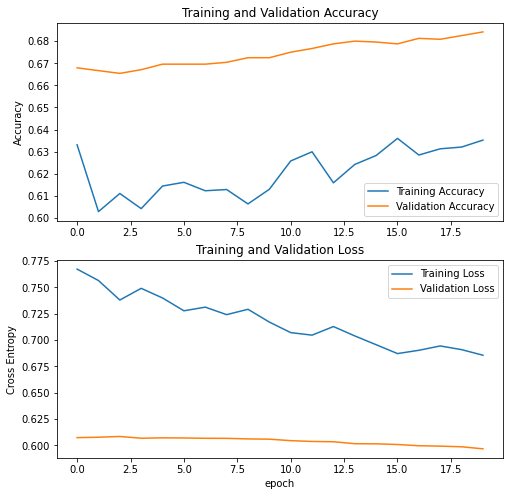

In [ ]:
acc_value = resnet_model_history_base.history['accuracy']
val_acc_value = resnet_model_history_base.history['val_accuracy']

loss_value = resnet_model_history_base.history['loss']
val_loss_value = resnet_model_history_base.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_value, label='Training Accuracy')
plt.plot(val_acc_value, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_value, label='Training Loss')
plt.plot(val_loss_value, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc, prec, recall, f1, auc = get_model_metrics(model_resnet50, test_ds, verbose = True) 


['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc'] 
 [0.5845168232917786, 267.0, 267.0, 3011.0, 1124.0, 0.7020775079727173, 0.5, 0.19194823503494263, 0.6915271878242493, 0.4456489384174347]

Accuracy Score: 0.7020775079727173
Precision Score: 0.5
Recall: 0.19194823503494263
AUC: 0.6915271878242493
F1-score: 0.2774025935989987
Confusion matrix: 
[[3011  267]
 [1124  267]]


### **4.2 - Fine-tuned model**
As I did with VGG19, I will fine-tune the model by fine-tuning convolutional weights alongside it. I decided to keep the first 125 layers out of 175 of the convolutional base frozen and unfreeze the top ones, compiled and trained the model for an additional 15 epochs. 

This didn't cause a significant increase in performance, with a 72% accuracy, 20% recall and 30% f1-score.


In [ ]:
# Unfreeze the base_model. 
base_model_resnet50.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_resnet50.layers))

# Fine-tune from this layer onwards, so freeze the layers above fine_tune_resnet50_at.
fine_tune_resnet50_at = 125 

for layer in base_model_resnet50.layers[:fine_tune_resnet50_at]:
  layer.trainable = False


model_resnet50.compile(
    loss='binary_crossentropy',
    optimizer=sgd,
    metrics=METRICS)

model_resnet50.summary()


Number of layers in the base model:  175
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 112, 112, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem_7 ( (None, 112, 112, 3)       0         
_________________________________________________________________
tf.nn.bias_add_7 (TFOpLambda (None, 112, 112, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_24 (Dropo

In [ ]:
len(model_resnet50.trainable_variables)

66

In [ ]:
fine_tune_epochs = 15 
total_epochs =  initial_epochs + fine_tune_epochs

resnet_model_history_fine = model_resnet50.fit(train_generator,
                                               steps_per_epoch=nb_train_samples // train_batch_size,
                                               epochs = total_epochs,
                                               validation_data=validation_generator,
                                               validation_steps=nb_validation_samples // validation_batch_size,
                                               initial_epoch=resnet_model_history_base.epoch[-1],
                                               verbose = 0
                                               )



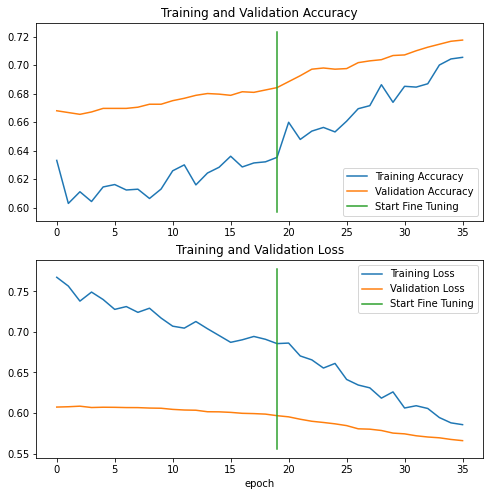

In [ ]:
acc_value += resnet_model_history_fine.history['accuracy']
val_acc_value += resnet_model_history_fine.history['val_accuracy']

loss_value += resnet_model_history_fine.history['loss']
val_loss_value += resnet_model_history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_value, label='Training Accuracy')
plt.plot(val_acc_value, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_value, label='Training Loss')
plt.plot(val_loss_value, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc, prec, recall, f1, auc = get_model_metrics(model_resnet50, test_ds, verbose = True) 


['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc'] 
 [0.5487490892410278, 276.0, 185.0, 3093.0, 1115.0, 0.7215678095817566, 0.5986984968185425, 0.19841840863227844, 0.775449812412262, 0.5421057343482971]

Accuracy Score: 0.7215678095817566
Precision Score: 0.5986984968185425
Recall: 0.19841840863227844
AUC: 0.775449812412262
F1-score: 0.29805616259534085
Confusion matrix: 
[[3093  185]
 [1115  276]]


### **4.3 - Summary for ResNet50 training**
After training my baseline model, taking into account an updated initial bias, and then fine-tuning, the performance metrics of the ResNet50 of my dataset is still pretty low as seen in the table below, especially the recall and f1-score our main metrics of interst.

| Model | Accuracy   | Precision   | Recall   | F1-score   |
|------|------|------|------|------|
|   ResNet50 baseline   | 0.68 |  0.22  | 0.03 |  0.05  |
|   ResNet50 baseline (with initial bias) | 0.70 |  0.50  | 0.19 |  0.28  |
|  ResNet50 fine-tuned | 0.72 |   0.60  | 0.20 |  0.30  |

## **5 - InceptionV3**
Inception-v3 is a convolutional neural network that is 48 layers deep. I loaded a pretrained version of the network trained on more than a million images from the ImageNet database. Similarly to VGG19, the pretrained network can classify images into 1000 object categories.

### **5.1 - Baseline model**
The main steps to build the baseline model are the same as with VGG19. The convolutional base was frozen and I trained the model on the last 3 dense fully connected layers. The input data are images of pixels (112, 112, 3).

I compiled the model using a binary_crossentropy loss function and the SGD optimizer with a learning rate of 1e-6. Finally I trained my model on the training set for 20 epochs with a batch size of 100 and 40 for the training and validation set respectively.

In [ ]:
# Drop the 3 fully connected layers of the loaded InceptionV3 model by using include_top=False.
base_model_inceptionv3 = InceptionV3(include_top=False, weights='imagenet') 

# Freeze the base_model
base_model_inceptionv3.trainable = False

# Create new model on top
inputs = keras.Input(shape=(112, 112, 3))

# Format for data which includes rescaling and/or other normalization operations.
x = tf.keras.applications.inception_v3.preprocess_input(inputs) 

# The base model contains batchnorm layers. We want to keep them in inference mode when we unfreeze the base model for fine-tuning, 
# so we make sure that the base_model is running in inference mode here.
x = base_model_inceptionv3(x, training=False)

# Generate predictions from the block of features, flatten over the spatial locations and output an 8192-vector.
x = tf.keras.layers.Flatten()(x)

# Add 2 fully connected layers each followed by dropout. Regularizing with a dropout layer could help with overfitting.
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)  
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)

# 3rd fully connected dense layres which is the final/classifier layer.
outputs = keras.layers.Dense(1, activation=('sigmoid'))(x) 

model_inceptionv3 = keras.Model(inputs, outputs)


my_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5),
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]


87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
initial_epochs = 20
learn_rate=1e-6
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False) 


model_inceptionv3.compile(
    loss='binary_crossentropy',
    optimizer=sgd,
    metrics=METRICS)

model_inceptionv3.summary()


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 112, 112, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 112, 112, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 112, 112, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0   

In [ ]:
len(model_inceptionv3.trainable_variables)

6

In [ ]:
train_batch_size = 100 
validation_batch_size = 40 

inception_model_history_base = model_inceptionv3.fit(train_generator,
                                               steps_per_epoch=nb_train_samples // train_batch_size,
                                               epochs = initial_epochs,
                                               validation_data=validation_generator,
                                               validation_steps=nb_validation_samples // validation_batch_size
                                               )                    

Epoch 1/20
90/90 [==============================] - 47s 458ms/step - loss: 1.0273 - tp: 2104.8242 - fp: 3160.9121 - tn: 3117.0440 - fn: 817.8681 - accuracy: 0.5800 - precision: 0.4088 - recall: 0.7326 - auc: 0.6663 - prc: 0.4670 - val_loss: 0.8638 - val_tp: 590.0000 - val_fp: 1292.0000 - val_tn: 357.0000 - val_fn: 161.0000 - val_accuracy: 0.3946 - val_precision: 0.3135 - val_recall: 0.7856 - val_auc: 0.4694 - val_prc: 0.2862
Epoch 2/20
90/90 [==============================] - 39s 436ms/step - loss: 0.9347 - tp: 864.3736 - fp: 1780.0769 - tn: 1251.5385 - fn: 697.9670 - accuracy: 0.4548 - precision: 0.3212 - recall: 0.5546 - auc: 0.4733 - prc: 0.3192 - val_loss: 0.7841 - val_tp: 474.0000 - val_fp: 1057.0000 - val_tn: 599.0000 - val_fn: 270.0000 - val_accuracy: 0.4471 - val_precision: 0.3096 - val_recall: 0.6371 - val_auc: 0.4911 - val_prc: 0.2935
Epoch 3/20
90/90 [==============================] - 39s 439ms/step - loss: 0.9300 - tp: 731.9451 - fp: 1582.4615 - tn: 1395.5055 - fn: 837.5604

The validation accuracy is above the training one, which is a sign that the model may not be overfitting the data and may generalize well. The loss and accuracy curve seems to flatten past 10 epochs, suggesting that the model might be converging. Let's evaluate the performance metrics to check that.

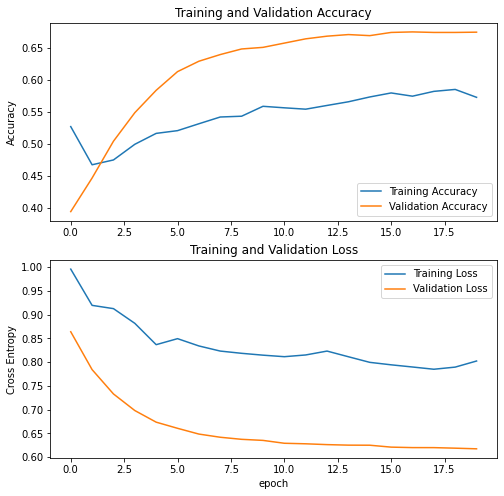

In [ ]:
acc_value = inception_model_history_base.history['accuracy']
val_acc_value = inception_model_history_base.history['val_accuracy']

loss_value = inception_model_history_base.history['loss']
val_loss_value = inception_model_history_base.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_value, label='Training Accuracy')
plt.plot(val_acc_value, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_value, label='Training Loss')
plt.plot(val_loss_value, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

After computing the performance metrics, you can see that the accuracy is average, with recall and precision being very low. The amount of false negatives (1293) is too large and unacceptable for this medical dataset. This suggests that the model hasn't converged yet.

In [ ]:
acc, prec, recall, f1, auc = get_model_metrics(model_inceptionv3, test_ds, verbose = True) 


['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc'] 
 [0.6464740633964539, 98.0, 254.0, 3024.0, 1293.0, 0.6686656475067139, 0.27840909361839294, 0.07045291364192963, 0.5033911466598511, 0.29172906279563904]

Accuracy Score: 0.6686656475067139
Precision Score: 0.27840909361839294
Recall: 0.07045291364192963
AUC: 0.5033911466598511
F1-score: 0.11244980205131898
Confusion matrix: 
[[3024  254]
 [1293   98]]


- The non-convergence above could be due to the fact that I have imbalance data. To deal with it, I initialized the initial bias by adding 2.0 to the natural logarithm of the ratio of positives to negatives in the training set for a value of 1.33, this to help with the initial convergence of the baseline model. I then re-trained the model with the same parameters as above.

In [ ]:
# Drop the 3 fully connected layers of the loaded InceptionV3 model by using include_top=False.
base_model_inceptionv3 = InceptionV3(include_top=False, weights='imagenet') 

# Freeze the base_model
base_model_inceptionv3.trainable = False

# Create new model on top
inputs = keras.Input(shape=(112, 112, 3))

# Initialize bias
output_bias = tf.keras.initializers.Constant(init_bias + 2.0)

# Format for data which includes rescaling and/or other normalization operations.
x = tf.keras.applications.inception_v3.preprocess_input(inputs) 

# The base model contains batchnorm layers. We want to keep them in inference mode when we unfreeze the base model for fine-tuning, 
# so we make sure that the base_model is running in inference mode here.
x = base_model_inceptionv3(x, training=False)

# Generate predictions from the block of features, flatten over the spatial spatial locations.
x = tf.keras.layers.Flatten()(x)

# Add 2 fully connected layers each followed by dropout. Regularize with dropout could help with overfitting.
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)  
x = keras.layers.Dense(1024,activation=('relu'))(x) 
x = keras.layers.Dropout(0.4)(x)

# 3rd fully connected dense layres which is the final/classifier layer.
outputs = keras.layers.Dense(1, activation=('sigmoid'), bias_initializer=output_bias)(x) 

model_inceptionv3 = keras.Model(inputs, outputs)


my_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5),
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]


In [ ]:
initial_epochs = 20
learn_rate=1e-6
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False) 


model_inceptionv3.compile(
    loss='binary_crossentropy',
    optimizer=sgd,
    metrics=METRICS)

model_inceptionv3.summary()


Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 112, 112, 3)]     0         
_________________________________________________________________
tf.math.truediv_4 (TFOpLambd (None, 112, 112, 3)       0         
_________________________________________________________________
tf.math.subtract_4 (TFOpLamb (None, 112, 112, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
dropout_18 (Dropout)         (None, 1024)              0   

In [ ]:
train_batch_size = 100 
validation_batch_size = 40 

inception_model_history_base = model_inceptionv3.fit(train_generator,
                                               steps_per_epoch=nb_train_samples // train_batch_size,
                                               epochs = initial_epochs,
                                               validation_data=validation_generator,
                                               validation_steps=nb_validation_samples // validation_batch_size,
                                               verbose=0
                                               )


You can see that the accuracy and loss still flatten past 10 epochs. The validation accuracy is above the training one and validation loss below training one, suggesting possibly no overfitting. The metrics are slightly better now, but still pretty low recall and f1-score, with a pretty large amount of false negatives (1003). 

I am going to fine-tune the model in order to see if that can help improve the model's performance.

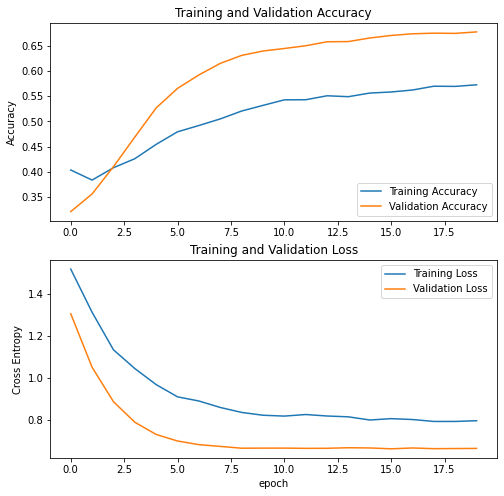

In [ ]:
acc_value = inception_model_history_base.history['accuracy']
val_acc_value = inception_model_history_base.history['val_accuracy']

loss_value = inception_model_history_base.history['loss']
val_loss_value = inception_model_history_base.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_value, label='Training Accuracy')
plt.plot(val_acc_value, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_value, label='Training Loss')
plt.plot(val_loss_value, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc, prec, recall, f1, auc = get_model_metrics(model_inceptionv3, test_ds, verbose = True) 


['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc'] 
 [0.6780728697776794, 388.0, 800.0, 2478.0, 1003.0, 0.6138359308242798, 0.3265993297100067, 0.2789360284805298, 0.5551086068153381, 0.32072383165359497]

Accuracy Score: 0.6138359308242798
Precision Score: 0.3265993297100067
Recall: 0.2789360284805298
AUC: 0.5551086068153381
F1-score: 0.30089182638628653
Confusion matrix: 
[[2478  800]
 [1003  388]]


### **5.2 - Fine-tuned model**
As I did with VGG19 and ResNet50, I will fine-tune the model by fine-tuning convolutional weights alongside it. I decided to keep the first 261 layers out of 311 of the convolutional base frozen and unfreeze the top ones, compiled and trained the model for an additional 15 epochs. 

This didn't cause a significant increase in performance, with a 67% accuracy, 29% recall and 34% f1-score.



In [ ]:
# Unfreeze the base_model.
base_model_inceptionv3.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_inceptionv3.layers))

# Fine-tune from this layer onwards, so freeze the layers above fine_tune_inceptionv3_at.
fine_tune_inceptionv3_at = 261

for layer in base_model_inceptionv3.layers[:fine_tune_inceptionv3_at]:
  layer.trainable = False


model_inceptionv3.compile(
    loss='binary_crossentropy',
    optimizer=sgd,
    metrics=METRICS)

model_inceptionv3.summary()


Number of layers in the base model:  311
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 112, 112, 3)]     0         
_________________________________________________________________
tf.math.truediv_4 (TFOpLambd (None, 112, 112, 3)       0         
_________________________________________________________________
tf.math.subtract_4 (TFOpLamb (None, 112, 112, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
dropout_18 (Dropou

In [ ]:
len(model_inceptionv3.trainable_variables)

33

In [ ]:
fine_tune_epochs = 15 
total_epochs =  initial_epochs + fine_tune_epochs

inception_model_history_fine = model_inceptionv3.fit(train_generator,
                                               steps_per_epoch=nb_train_samples // train_batch_size,
                                               epochs = total_epochs,
                                               validation_data=validation_generator,
                                               validation_steps=nb_validation_samples // validation_batch_size,
                                               initial_epoch=inception_model_history_base.epoch[-1],
                                               verbose = 0
                                               )  


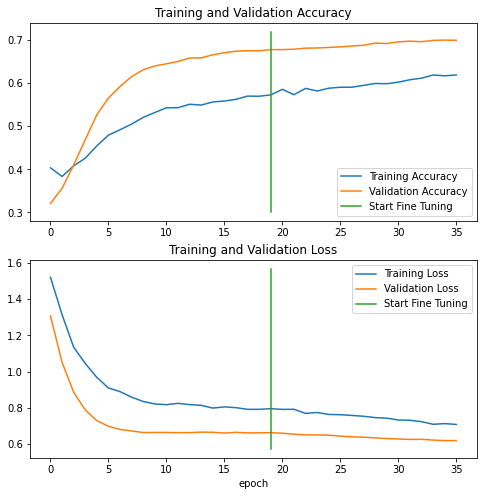

In [ ]:
acc_value += inception_model_history_fine.history['accuracy']
val_acc_value += inception_model_history_fine.history['val_accuracy']

loss_value += inception_model_history_fine.history['loss']
val_loss_value += inception_model_history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_value, label='Training Accuracy')
plt.plot(val_acc_value, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_value, label='Training Loss')
plt.plot(val_loss_value, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc, prec, recall, f1, auc = get_model_metrics(model_inceptionv3, test_ds, verbose = True) 


['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc'] 
 [0.6161528825759888, 402.0, 545.0, 2733.0, 989.0, 0.6714500188827515, 0.42449840903282166, 0.2890007197856903, 0.6257551908493042, 0.40474599599838257]

Accuracy Score: 0.6714500188827515
Precision Score: 0.42449840903282166
Recall: 0.2890007197856903
AUC: 0.6257551908493042
F1-score: 0.3438836595680588
Confusion matrix: 
[[2733  545]
 [ 989  402]]


### **5.3 - Summary for InceptionV3 training**

After training my baseline model, taking into account an updated initial bias, and then fine-tuning, the performance metrics of the InceptionV3 of my dataset is still pretty low as seen in the table below, especially the recall and f1-score our main metrics of interest.


| Model | Accuracy   | Precision   | Recall   | F1-score   |
|------|------|------|------|------|
|   InceptionV3 baseline   | 0.67 |  0.28  | 0.07 |  0.11  |
|   InceptionV3 baseline (with initial bias) | 0.61 |  0.33  | 0.28 |  0.30  |
|  InceptionV3 fine-tuned | 0.67 |   0.42  | 0.29 |  0.34  |

## **6 - Summary and future work**
The results with best performance metrics for each model can be summarized in the table below. VGG19 definitely outperforms ResNet50 and InceptionV3. However, it would be important to train the models for longer epochs and get more data to evaluate again the metrics.

| Model | Accuracy   | Precision   | Recall   | F1-score   |
|------|------|------|------|------|
|   VGG19 fine-tuned   | 0.77 |  0.63  | 0.58 |  0.60  |
|  ResNet50 fine-tuned | 0.72 |   0.60  | 0.20 |  0.30  |
|  InceptionV3 fine-tuned | 0.67 |   0.42  | 0.29 |  0.34  |



As future work, I need to load the data ensuring the same ratio of negative to positive samples for comparable results.

It may also be important to use more computational power in order to run all the deep learning models with larger pixel size as required by the models and train them longer with all the 270k+ image data. Deep learning models are data hungry and when using them on a new dataset, it is important to use few tens of thousands of data not only for each of the validation and test sets, but most importantly for the training set to help the model learn best the features in the data.